In [316]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [317]:
print("1. Data Exploration")

1. Data Exploration


In [318]:
#Loading dataset and displaying first few rows
path = r'C:\Users\jatt\Downloads\youtubers_df.csv'
data = pd.read_csv(path)
data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [319]:
#Displaying last few rows
data.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [320]:
# Displaying the number of rows and columns 
data.shape

(1000, 9)

In [321]:
# Displaying the names of the columns
data.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [322]:
# Displaying the data type of each column 
data.dtypes

Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [323]:
# Displaying the count of missing values in each column
data.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [324]:
# Displaying the count of unique values in each column
data.nunique()

Rank          1000
Username       994
Categories      45
Suscribers     274
Country         29
Visits         713
Likes          648
Comments       389
Links          994
dtype: int64

In [325]:
#Displaying information about dataset
data.info

<bound method DataFrame.info of      Rank              Username           Categories   Suscribers  \
0       1               tseries       Música y baile  249500000.0   
1       2               MrBeast   Videojuegos, Humor  183500000.0   
2       3             CoComelon            Educación  165500000.0   
3       4              SETIndia                  NaN  162600000.0   
4       5         KidsDianaShow  Animación, Juguetes  113500000.0   
..    ...                   ...                  ...          ...   
995   996          hamzymukbang                  NaN   11700000.0   
996   997            Adaahqueen                  NaN   11700000.0   
997   998  LittleAngelIndonesia       Música y baile   11700000.0   
998   999          PenMultiplex                  NaN   11700000.0   
999  1000         OneindiaHindi  Noticias y Política   11700000.0   

            Country       Visits      Likes  Comments  \
0             India      86200.0     2700.0      78.0   
1    Estados Unidos  1174

In [326]:
#Statistical summary of numerical columns
data.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [327]:
# Handling missing values by filling them with 'Unknown'
data.fillna('Unknown', inplace=True)

# Checking to see if missing values have been handled
data.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

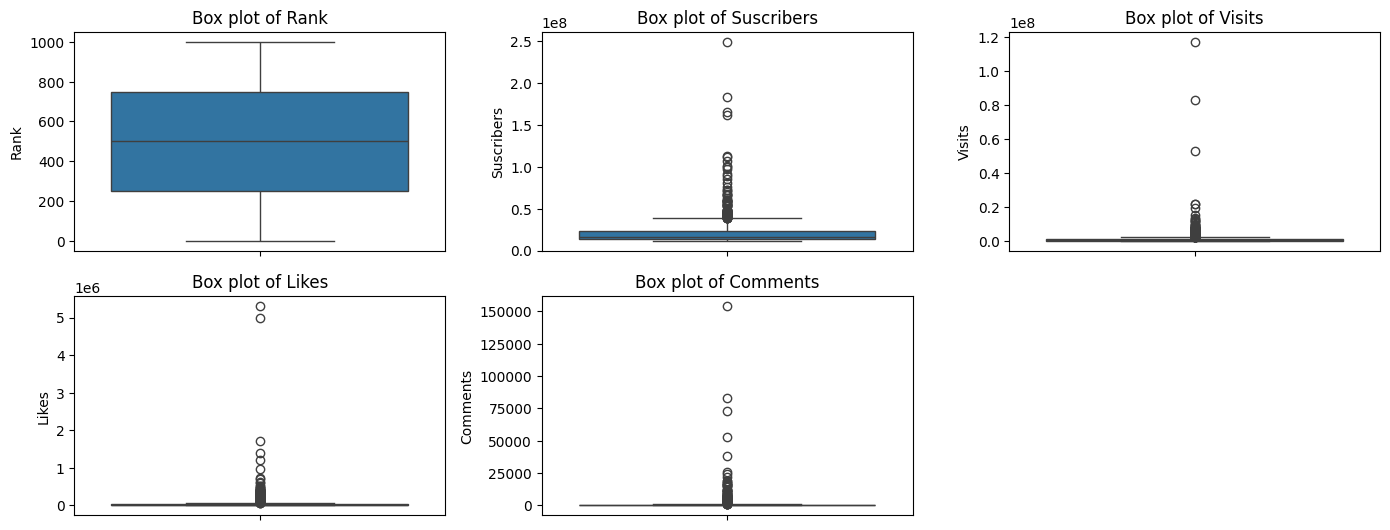

In [328]:
# Identifying numerical columns for outlier analysis
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Creating box plots for each numerical column to visualize outliers
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


In [329]:
# Displaying unique values in the 'Country' column in order to see the different countries involved
data['Country'].unique()

array(['India', 'Estados Unidos', 'Unknown', 'Brasil', 'México', 'Rusia',
       'Pakistán', 'Filipinas', 'Indonesia', 'Tailandia', 'Francia',
       'Colombia', 'Iraq', 'Japón', 'Ecuador', 'Argentina', 'Turquía',
       'Arabia Saudita', 'El Salvador', 'Bangladesh', 'Reino Unido',
       'Argelia', 'España', 'Perú', 'Egipto', 'Jordania', 'Marruecos',
       'Singapur', 'Somalia'], dtype=object)

In [330]:
# Checking for duplicate rows to remove redundant data
data.duplicated().sum()

np.int64(0)

In [331]:
# Renaming columns for consistency, changing 'Suscribers' to 'Subscribers'
data.rename(columns={"Suscribers": "Subscribers"}, inplace=True)

# Displaying the updated column names
data.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [332]:
print("2. Trend Analysis")

2. Trend Analysis


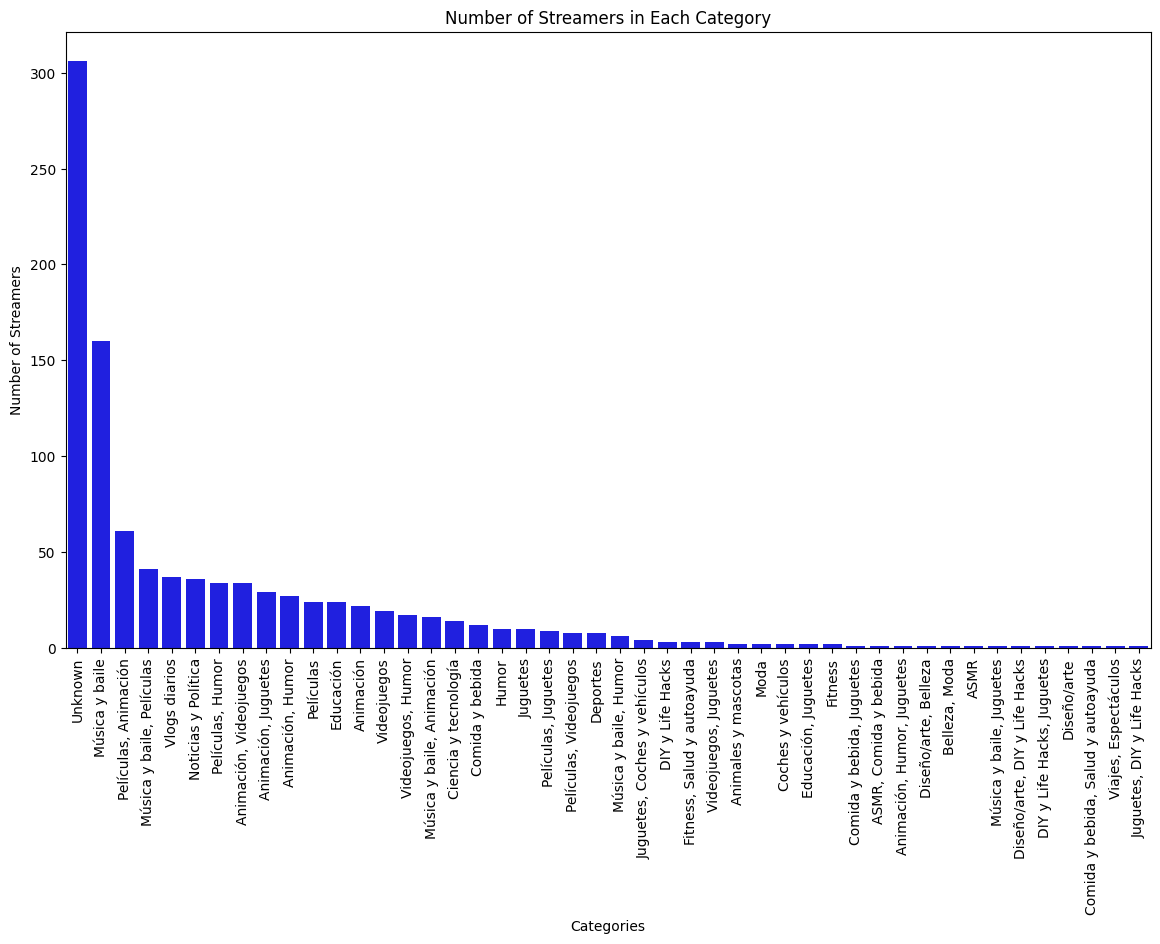

In [333]:
# Displaying the count of streamers in each category
category_counts = data['Categories'].value_counts()

# Plotting the count of streamers in each category
plt.figure(figsize=(14, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, color="blue")
plt.title('Number of Streamers in Each Category')
plt.ylabel('Number of Streamers')
plt.xlabel('Categories')
plt.xticks(rotation=90)
plt.show()

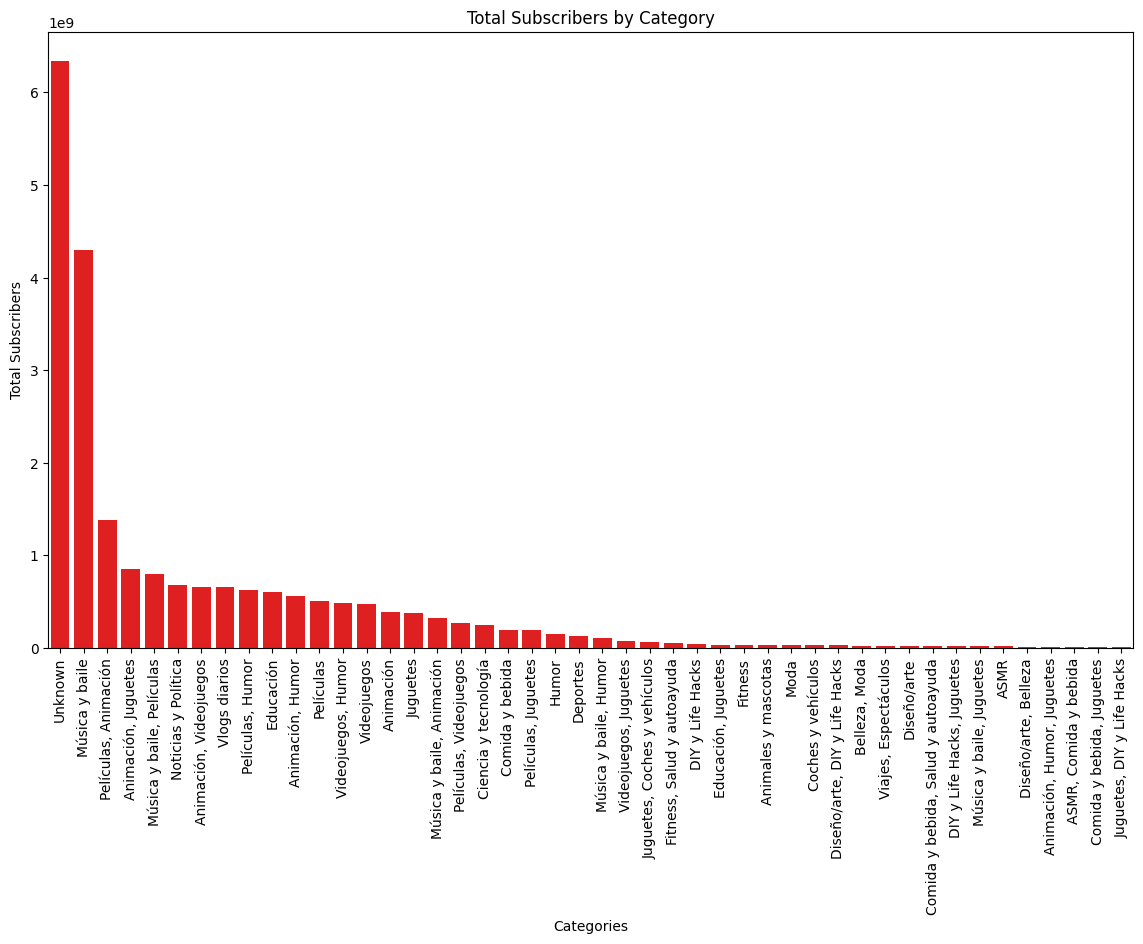

In [334]:
# Aggregating total subscribers by category
category_subscribers = data.groupby('Categories')['Subscribers'].sum().sort_values(ascending=False)

# Plotting the total subscribers by category 
plt.figure(figsize=(14, 8))
sns.barplot(x=category_subscribers.index, y=category_subscribers.values, color="red")
plt.title('Total Subscribers by Category')
plt.ylabel('Total Subscribers')
plt.xlabel('Categories')
plt.xticks(rotation=90) 
plt.show()


The correlation between Subscribers and Likes is :  0.2116386836800826


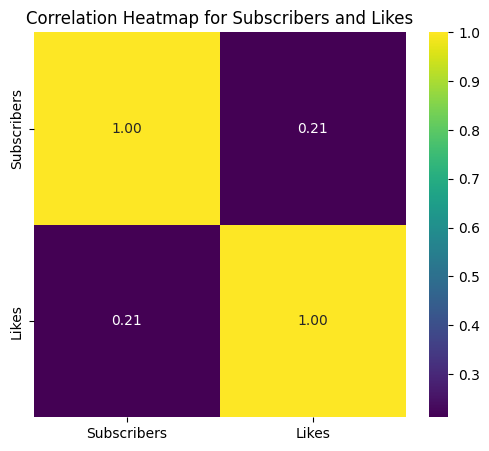

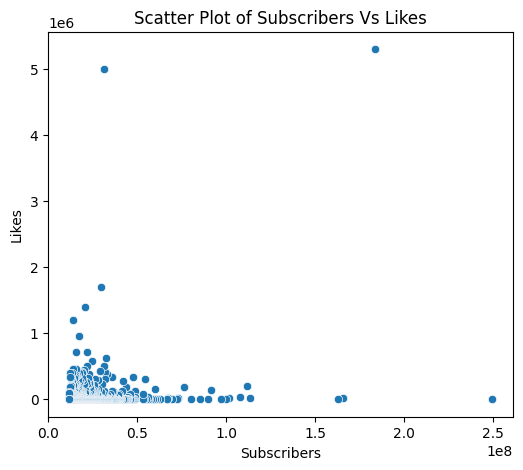

In [335]:
#Finding correlation between number of subscribers and number of likes
correlation = data['Subscribers'].corr(data['Likes'])
print("The correlation between Subscribers and Likes is : ", correlation)

#Heatmap for the correlation between Subscribers and Likes
correlation_matrix = data[['Subscribers', 'Likes']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap for Subscribers and Likes')
plt.show()

#Scatterplot to visualize the relationship between Subscribers and Likes
plt.figure(figsize=(6,5))
sns.scatterplot(x=data['Subscribers'], y=data['Likes'])
plt.title('Scatter Plot of Subscribers Vs Likes')
plt.xlabel('Subscribers')
plt.ylabel('Likes')
plt.show()

The correlation between Subscribers and Likes is :  0.03634982616105402


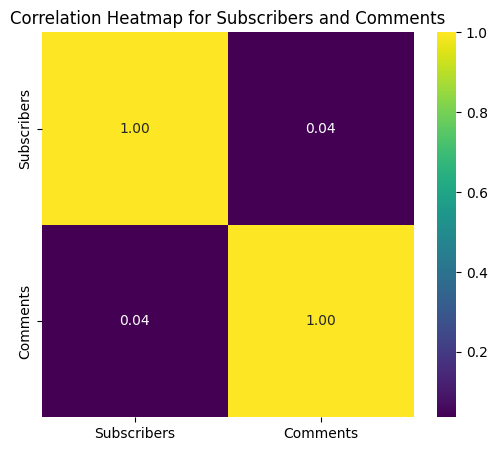

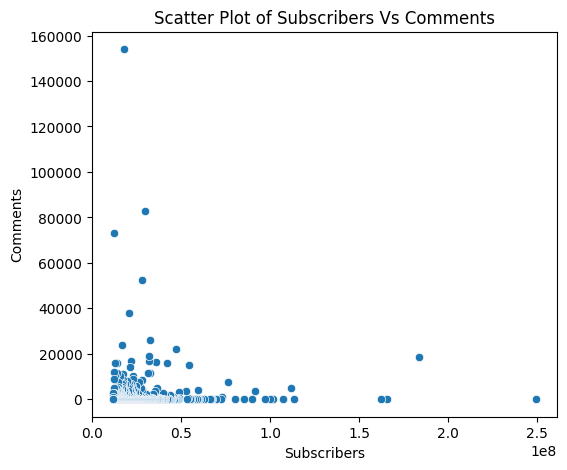

In [336]:
#Finding correlation between number of subscribers and number of comments
correlation = data['Subscribers'].corr(data['Comments'])
print("The correlation between Subscribers and Likes is : ", correlation)

#Heatmap for the correlation between Subscribers and Comments
correlation_matrix = data[['Subscribers', 'Comments']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap for Subscribers and Comments')
plt.show()

#Scatterplot to visualize the relationship between Subscribers and Comments
plt.figure(figsize=(6,5))
sns.scatterplot(x=data['Subscribers'], y=data['Comments'])
plt.title('Scatter Plot of Subscribers Vs Comments')
plt.xlabel('Subscribers')
plt.ylabel('Comments')
plt.show()

In [337]:
print('3. Audience Study')

3. Audience Study


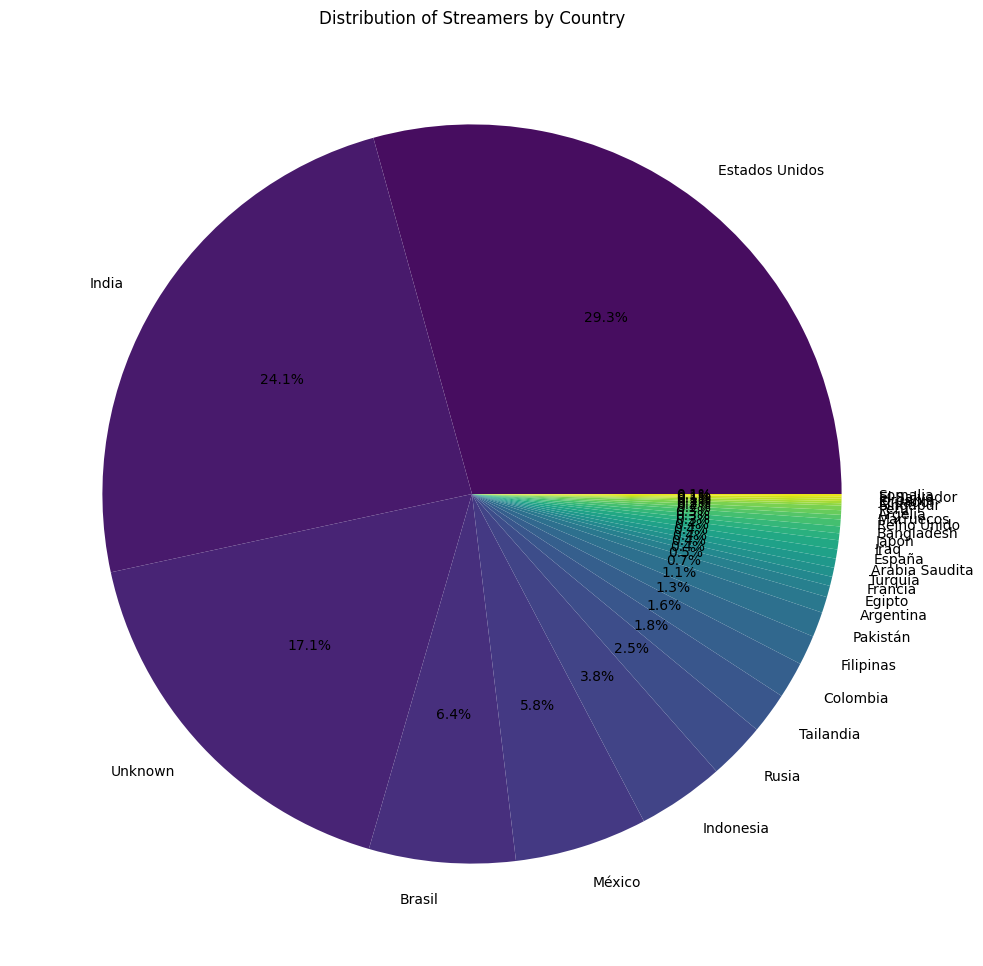

In [338]:
# Display the count of streamers in each country
country_counts = data['Country'].value_counts()

# Plot the count of streamers in each country as a pie chart
plt.figure(figsize=(12, 12))
country_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', len(country_counts)))
plt.title('Distribution of Streamers by Country')
plt.ylabel('') 
plt.show()

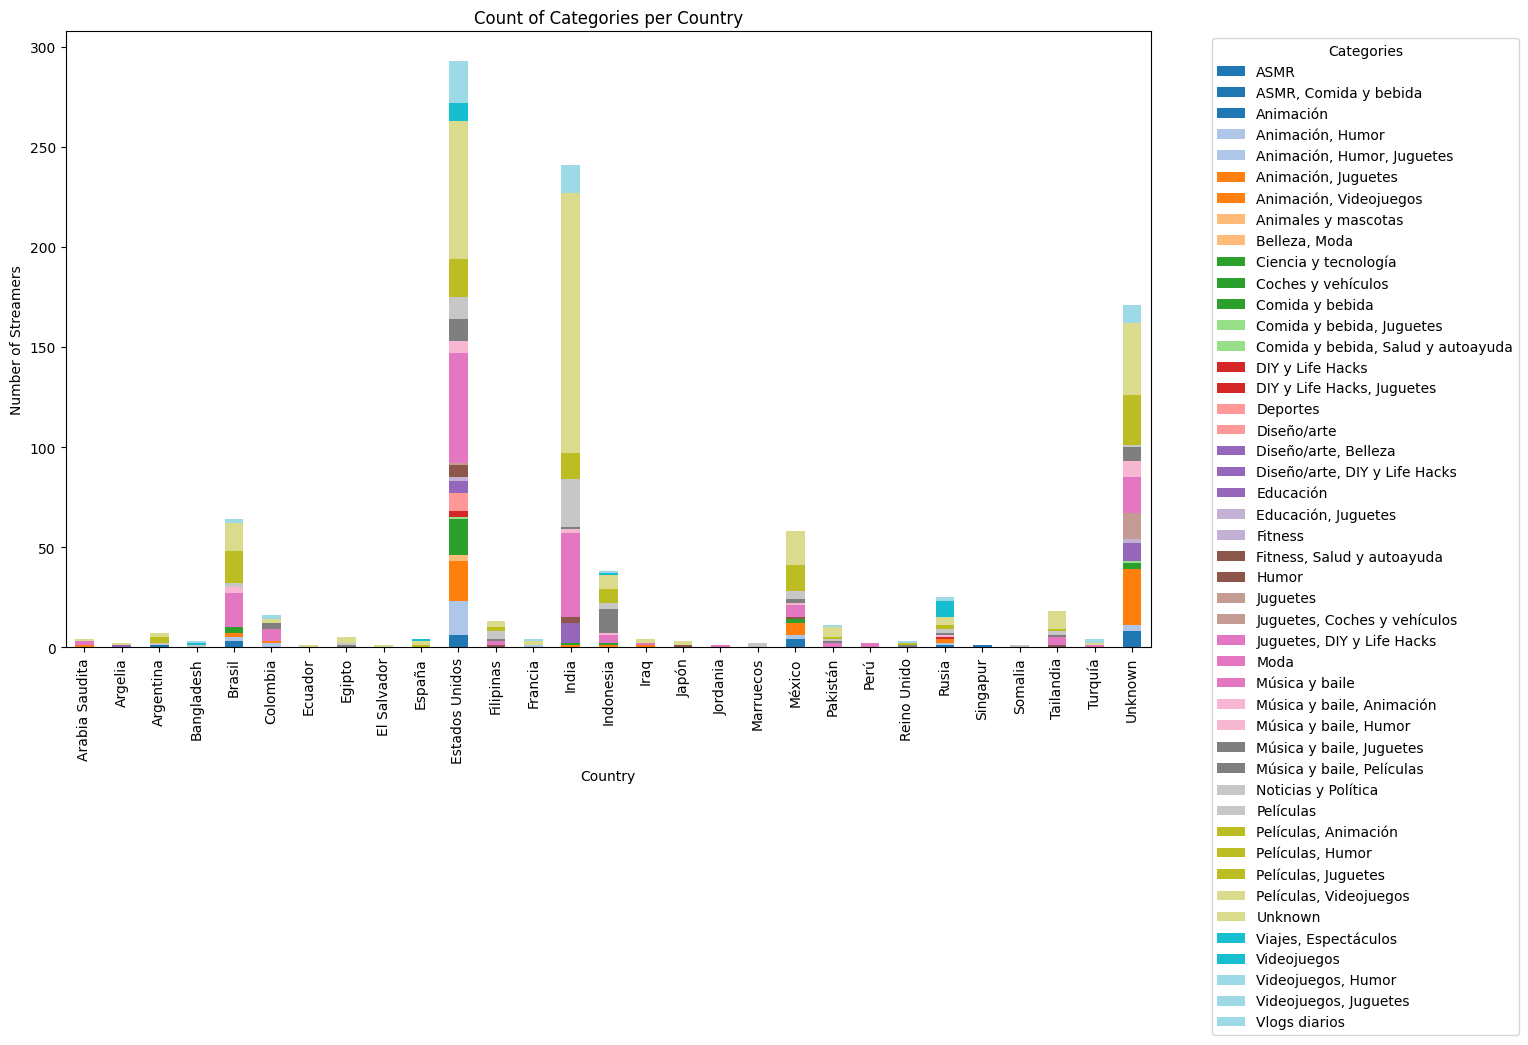

In [339]:
# Count of categories per country
category_country_counts = data.groupby(['Country', 'Categories']).size().unstack().fillna(0)

# Plotting the count of categories per country using a stacked bar plot
category_country_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Count of Categories per Country')
plt.ylabel('Number of Streamers')
plt.xlabel('Country')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [340]:
print('4. Performance Metrics')

4. Performance Metrics


In [341]:
# Calculate averages
avg_subscribers = data['Subscribers'].mean()
avg_likes = data['Likes'].mean()
avg_comments = data['Comments'].mean()
avg_visits = data['Visits'].mean()

# Print the averages
print("Average Subscribers:", avg_subscribers)
print("Average Likes:", avg_likes)
print("Average Comments:", avg_comments)
print("Average Visits:", avg_visits)

Average Subscribers: 21894400.0
Average Likes: 53632.592
Average Comments: 1288.768
Average Visits: 1209446.3155


In [342]:
average_metrics = data[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

# Convert the Series to a DataFrame for better visualization
average_metrics_df = average_metrics.reset_index()
average_metrics_df.columns = ['Metric', 'Average Value']

average_metrics_df

,Metric,Average Value
0,Subscribers,2.189440e+07
1,Visits,1.209446e+06
2,Likes,5.363259e+04
3,Comments,1.288768e+03


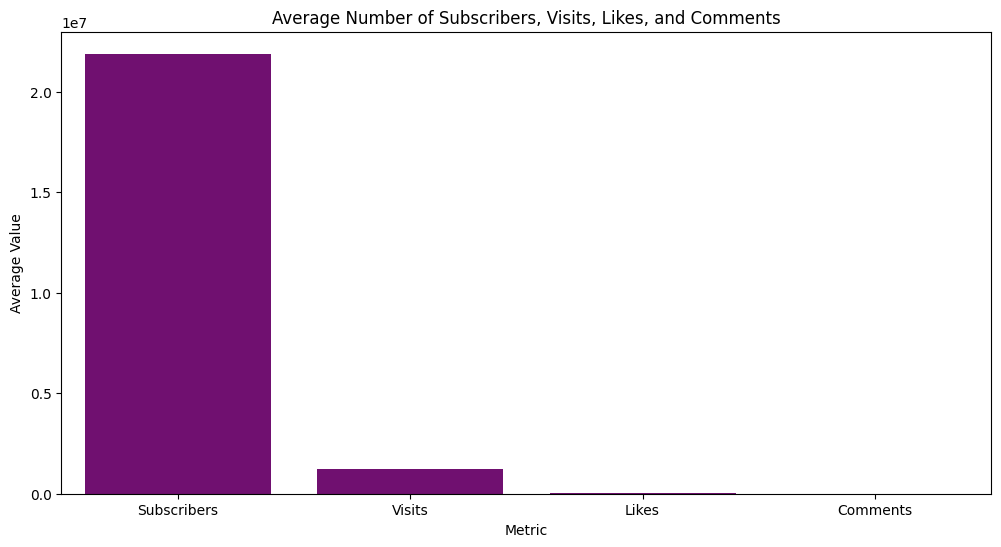

In [343]:
# Plotting the average metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Average Value', data=average_metrics_df, color='purple')
plt.title('Average Number of Subscribers, Visits, Likes, and Comments')
plt.ylabel('Average Value')
plt.xlabel('Metric')
plt.show()

In [344]:
print('5. Content Categories')

5. Content Categories


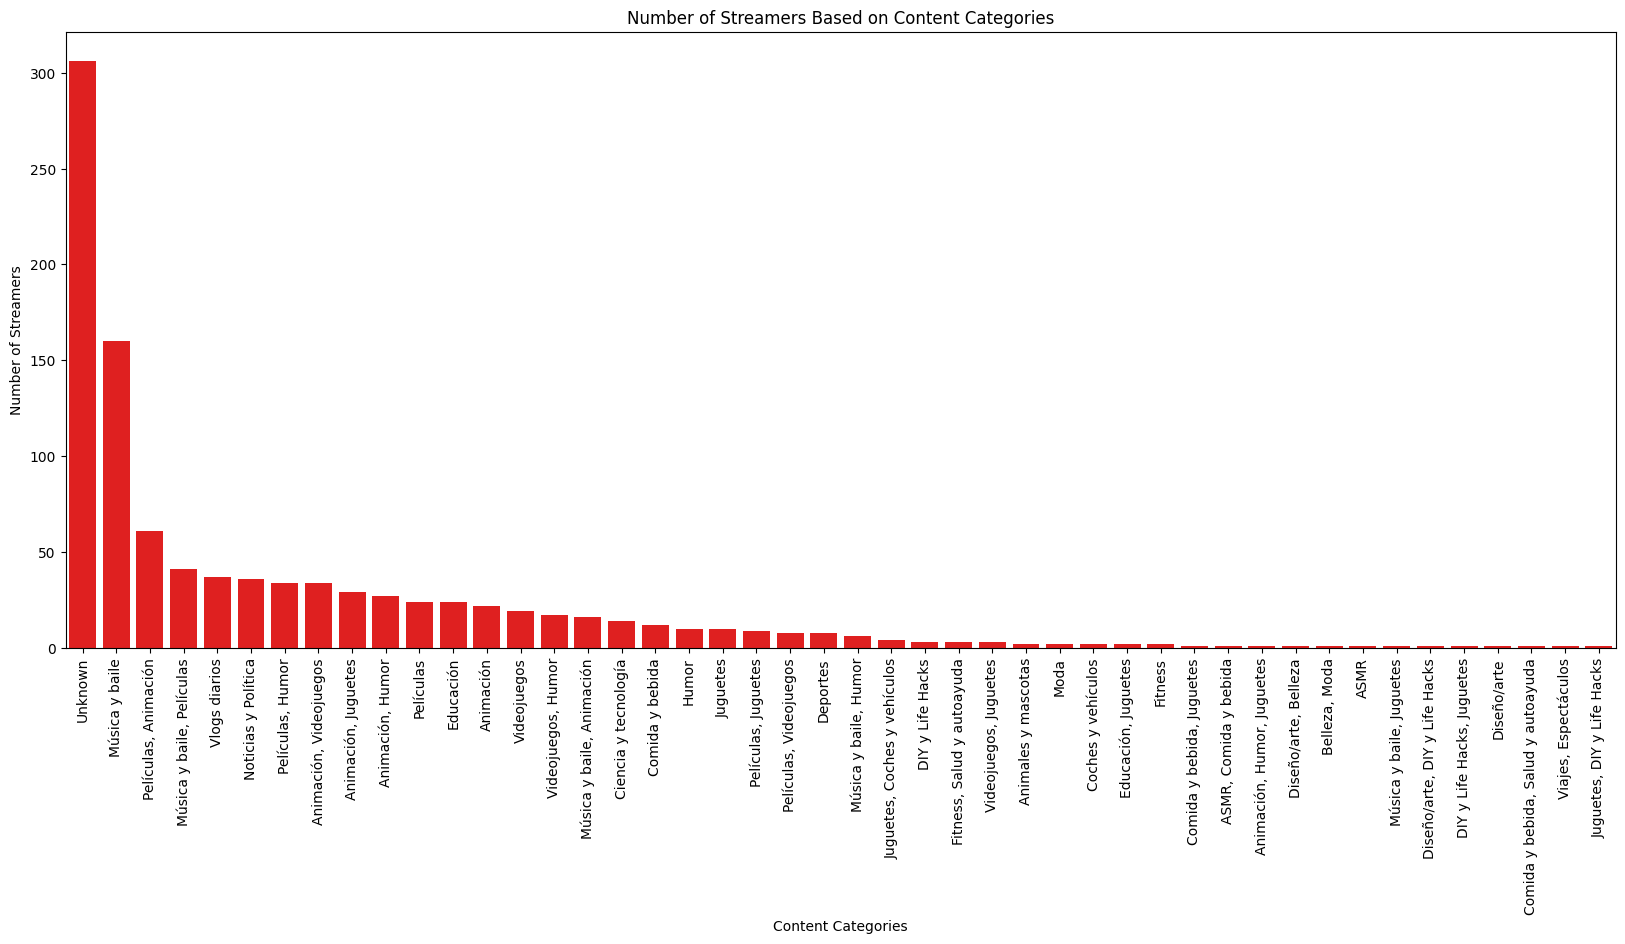

In [345]:
#Displaying the number of streamers based on category
category_counts = data['Categories'].value_counts()

plt.figure(figsize=(20, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, color='red')
plt.title("Number of Streamers Based on Content Categories")
plt.xlabel("Content Categories")
plt.ylabel("Number of Streamers")
plt.xticks(rotation=90)
plt.show()

In [346]:
# Count the number of streamers per category
category_counts = data['Categories'].value_counts()

# Finding the category with the highest number of streamers
top_category = category_counts.idxmax()
top_category_count = category_counts.max()

print(f"The category with the highest number of streamers is '{top_category}' with {top_category_count} streamers.")

The category with the highest number of streamers is 'Unknown' with 306 streamers.


In [347]:
# Grouping the data by 'Categories' and calculating the mean of performance metrics
category_metrics = data.groupby('Categories')[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
# Adding columns to indicate exceptional performance for each metric
category_metrics['Exceptional Subscribers'] = category_metrics['Subscribers'] > category_metrics['Subscribers'].mean()
category_metrics['Exceptional Visits'] = category_metrics['Visits'] > category_metrics['Visits'].mean()
category_metrics['Exceptional Likes'] = category_metrics['Likes'] > category_metrics['Likes'].mean()
category_metrics['Exceptional Comments'] = category_metrics['Comments'] > category_metrics['Comments'].mean()
# Filtering the categories that are exceptional in any metric
exceptional_categories = category_metrics[
    category_metrics[['Exceptional Subscribers', 'Exceptional Visits', 'Exceptional Likes', 'Exceptional Comments']].any(axis=1)
]
exceptional_categories

,Subscribers,Visits,Likes,Comments,Exceptional Subscribers,Exceptional Visits,Exceptional Likes,Exceptional Comments
Categories,,,,,,,,
"Animación, Humor",2.078519e+07,3.760126e+06,145768.333333,5344.962963,True,True,True,True
"Animación, Juguetes",2.937586e+07,5.254483e+05,2653.068966,0.517241,True,False,False,False
"Animación, Videojuegos",1.939412e+07,1.200059e+06,79294.029412,3786.617647,False,True,True,True
Animales y mascotas,1.560000e+07,2.231450e+06,102750.000000,2806.000000,False,True,True,True
"Belleza, Moda",2.390000e+07,9.645000e+05,62300.000000,1100.000000,True,False,True,True
Ciencia y tecnología,1.726429e+07,8.871286e+05,59283.142857,1363.571429,False,False,True,True
Comida y bebida,1.612500e+07,2.722450e+06,128664.750000,3053.416667,False,True,True,True
"Comida y bebida, Salud y autoayuda",2.010000e+07,1.149000e+05,2800.000000,117.000000,True,False,False,False
"DIY y Life Hacks, Juguetes",1.910000e+07,2.300000e+06,33200.000000,2100.000000,False,True,False,True


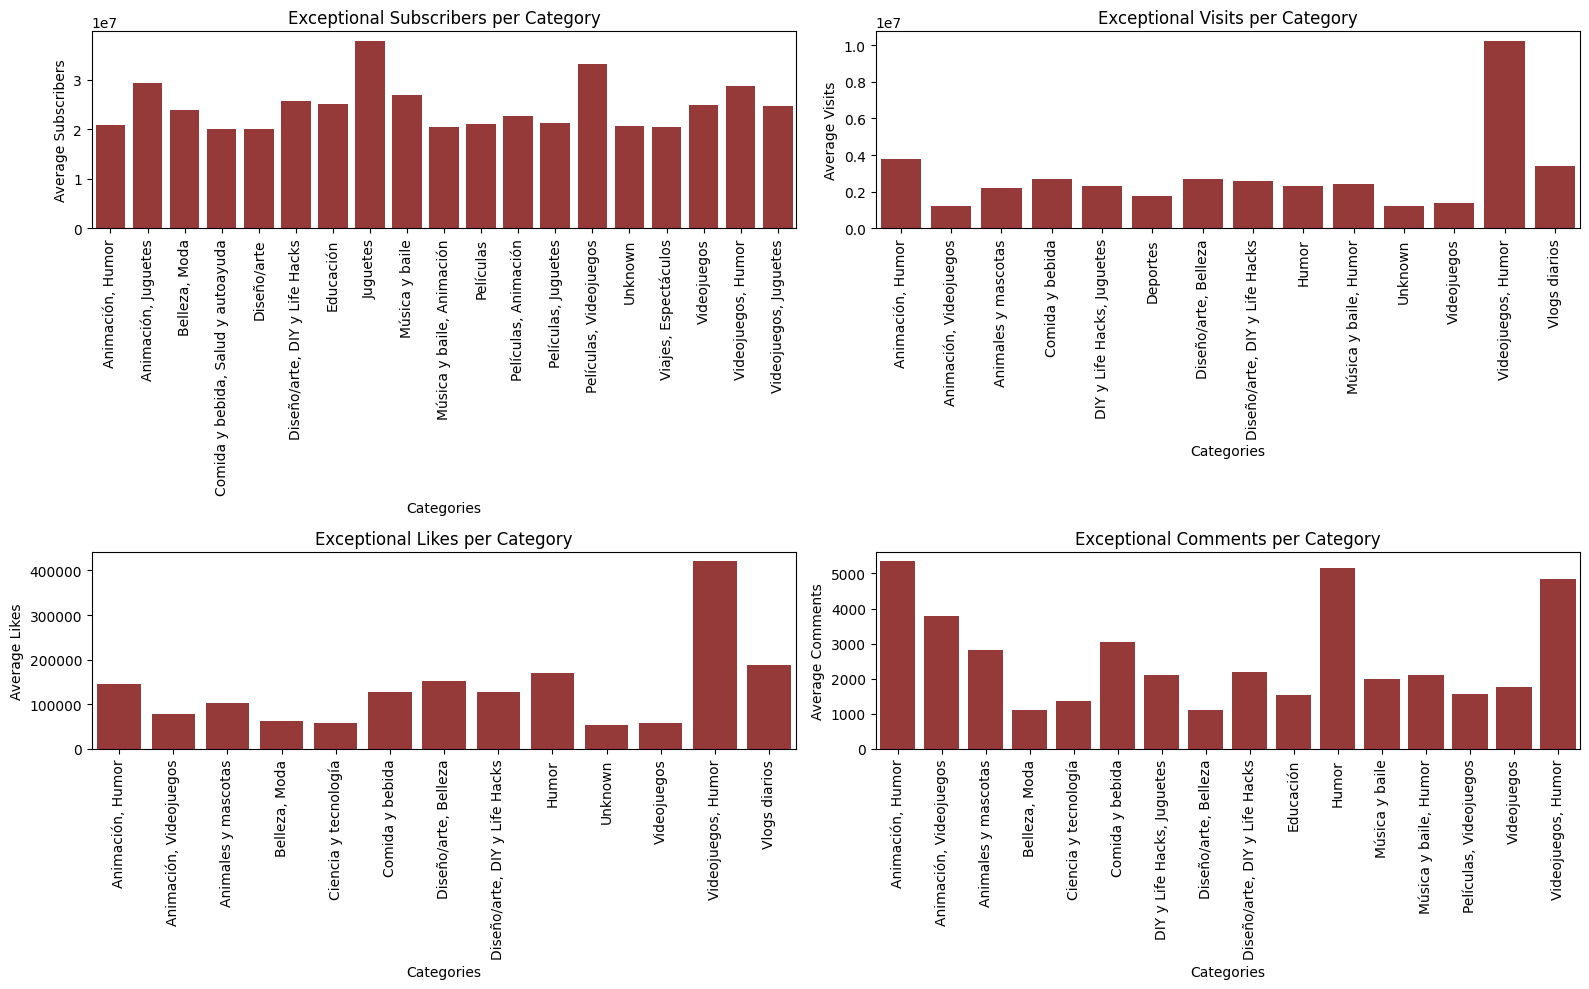

In [348]:
exceptional_subscribers = category_metrics[category_metrics['Subscribers'] > category_metrics['Subscribers'].mean()]
exceptional_visits = category_metrics[category_metrics['Visits'] > category_metrics['Visits'].mean()]
exceptional_likes = category_metrics[category_metrics['Likes'] > category_metrics['Likes'].mean()]
exceptional_comments = category_metrics[category_metrics['Comments'] > category_metrics['Comments'].mean()]

plt.figure(figsize=(16, 10))

metrics = {
    'Subscribers': exceptional_subscribers,
    'Visits': exceptional_visits,
    'Likes': exceptional_likes,
    'Comments': exceptional_comments
}

for i, (metric, data) in enumerate(metrics.items(), 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=data.index, y=metric, data=data, color='brown')
    plt.title(f'Exceptional {metric} per Category')
    plt.xticks(rotation=90)
    plt.ylabel(f'Average {metric}')
    plt.xlabel('Categories')

plt.tight_layout()
plt.show()

In [349]:
print('6. Brands and Collaborations')


6. Brands and Collaborations


In [350]:
#Reloading
data = pd.read_csv(r'C:\Users\jatt\Downloads\youtubers_df.csv')
data.rename(columns={"Suscribers": "Subscribers"}, inplace=True)

# Sort by Likes to find top performers
top_brands = data[['Categories','Comments', 'Likes', 'Visits']].sort_values(by='Likes', ascending=False).head()

top_brands

,Categories,Comments,Likes,Visits
1,"Videojuegos, Humor",18500.0,5300000.0,117400000.0
136,Vlogs diarios,11600.0,5000000.0,83100000.0
153,"Animación, Humor",82800.0,1700000.0,52700000.0
341,Humor,38000.0,1400000.0,11100000.0
734,NaN,15800.0,1200000.0,11700000.0


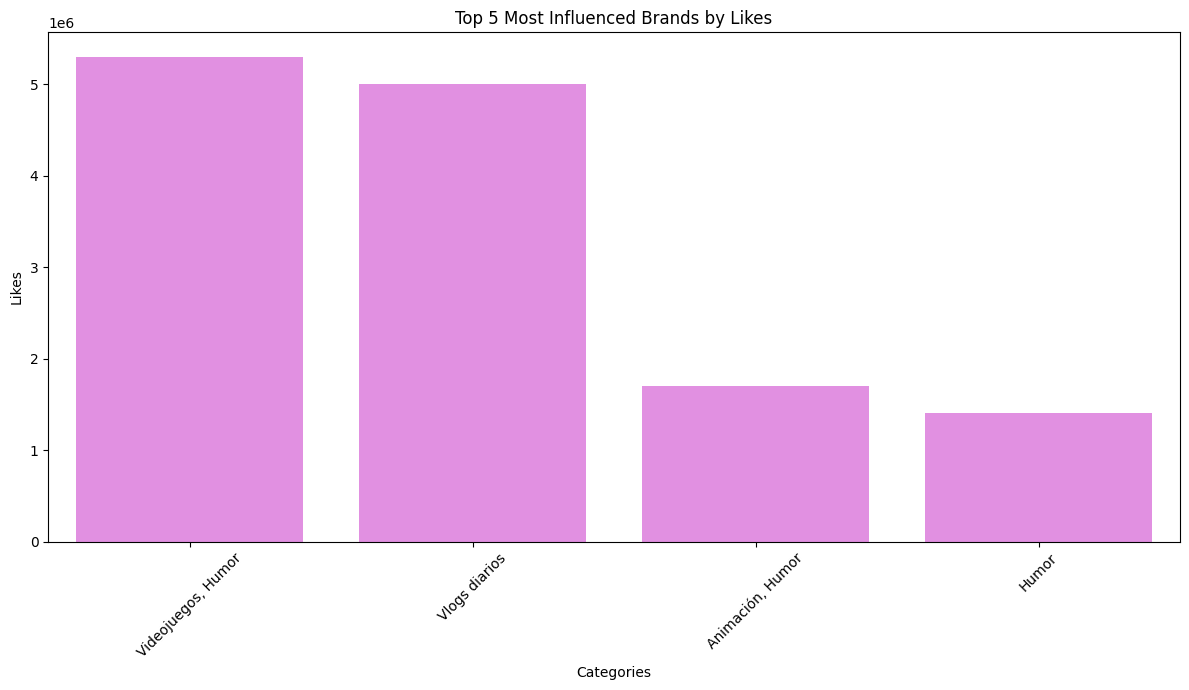

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [351]:
# Barplot for top 5 influenced brands based on Likes
plt.figure(figsize=(12, 7))
sns.barplot(data=top_brands, x='Categories', y='Likes', color='violet')
plt.title("Top 5 Most Influenced Brands by Likes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

data.columns

In [352]:
print('7. Benchmarking')

7. Benchmarking


In [353]:
# Streamers with above-average performance
data['Above_avgSubscribers'] = data['Subscribers'] > avg_subscribers
data['Above_avgVisits'] = data['Visits'] > avg_visits
data['Above_avgLikes'] = data['Likes'] > avg_likes
data['Above_avgComments'] = data['Comments'] > avg_comments

# Filter to get top-performing streamers
top_performing_streamers = data[
    data['Above_avgSubscribers'] & data['Above_avgVisits'] & data['Above_avgLikes'] & data['Above_avgComments']
]

# Display the top-performing streamers
top_performing_streamers

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,Above_avgSubscribers,Above_avgVisits,Above_avgLikes,Above_avgComments
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,True,True,True,True
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,True,True,True,True
26,27,dudeperfect,Videojuegos,59700000.0,Estados Unidos,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...,True,True,True,True
34,35,TaylorSwift,Música y baile,54100000.0,Estados Unidos,4300000.0,300400.0,15000.0,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...,True,True,True,True
39,40,JuegaGerman,"Películas, Animación",48600000.0,México,2000000.0,117100.0,3000.0,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...,True,True,True,True
43,44,A4a4a4a4,"Animación, Humor",47300000.0,Rusia,9700000.0,330400.0,22000.0,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...,True,True,True,True
58,59,Mikecrack,"Películas, Animación",43400000.0,México,2200000.0,183400.0,1800.0,http://youtube.com/channel/UCqJ5zFEED1hWs0KNQC...,True,True,True,True
62,63,KimberlyLoaiza,Música y baile,42100000.0,México,5300000.0,271300.0,16000.0,http://youtube.com/channel/UCQZfFRohQ7UX-0CdXl...,True,True,True,True
64,65,luisitocomunica,NaN,41100000.0,México,2500000.0,128900.0,1800.0,http://youtube.com/channel/UCECJDeK0MNapZbpaOz...,True,True,True,True
70,71,JessNoLimit,"Películas, Animación",39600000.0,Indonesia,1300000.0,73500.0,1600.0,http://youtube.com/channel/UCvh1at6xpV1ytYOAzx...,True,True,True,True


In [354]:
# Calculating the Z-scores 
data['Z_Subscribers'] = (data['Subscribers'] - data['Subscribers'].mean()) / data['Subscribers'].std()
data['Z_Visits'] = (data['Visits'] - data['Visits'].mean()) / data['Visits'].std()
data['Z_Likes'] = (data['Likes'] - data['Likes'].mean()) / data['Likes'].std()
data['Z_Comments'] = (data['Comments'] - data['Comments'].mean()) / data['Comments'].std()

# Calculating the composite Z-score (average of Z-scores)
data['Composite_Z'] = data[['Z_Subscribers', 'Z_Visits', 'Z_Likes', 'Z_Comments']].mean(axis=1)

# Sorting by composite Z-score to find top content creators
top_creators = data.sort_values(by='Composite_Z', ascending=False).head(10)
top_creators_display = top_creators[['Username', 'Subscribers', 'Visits', 'Likes', 'Comments', 'Composite_Z']]
top_creators_display

,Username,Subscribers,Visits,Likes,Comments,Composite_Z
1,MrBeast,183500000.0,117400000.0,5300000.0,18500.0,13.672574
136,MrBeast2,31300000.0,83100000.0,5000000.0,11600.0,9.226691
153,DaFuqBoom,29800000.0,52700000.0,1700000.0,82800.0,7.180198
436,BispoBrunoLeonardo,18000000.0,762100.0,276400.0,154000.0,5.769031
958,dojacat,11900000.0,13600000.0,395300.0,73000.0,3.419749
0,tseries,249500000.0,86200.0,2700.0,78.0,3.233708
341,triggeredinsaan,20400000.0,11100000.0,1400000.0,38000.0,3.108993
488,BeastPhilanthropy,16900000.0,21500000.0,952100.0,24000.0,2.603836
2,CoComelon,165500000.0,7000000.0,24700.0,0.0,2.334698
177,DanTDM,27800000.0,3500000.0,285000.0,52500.0,2.310206


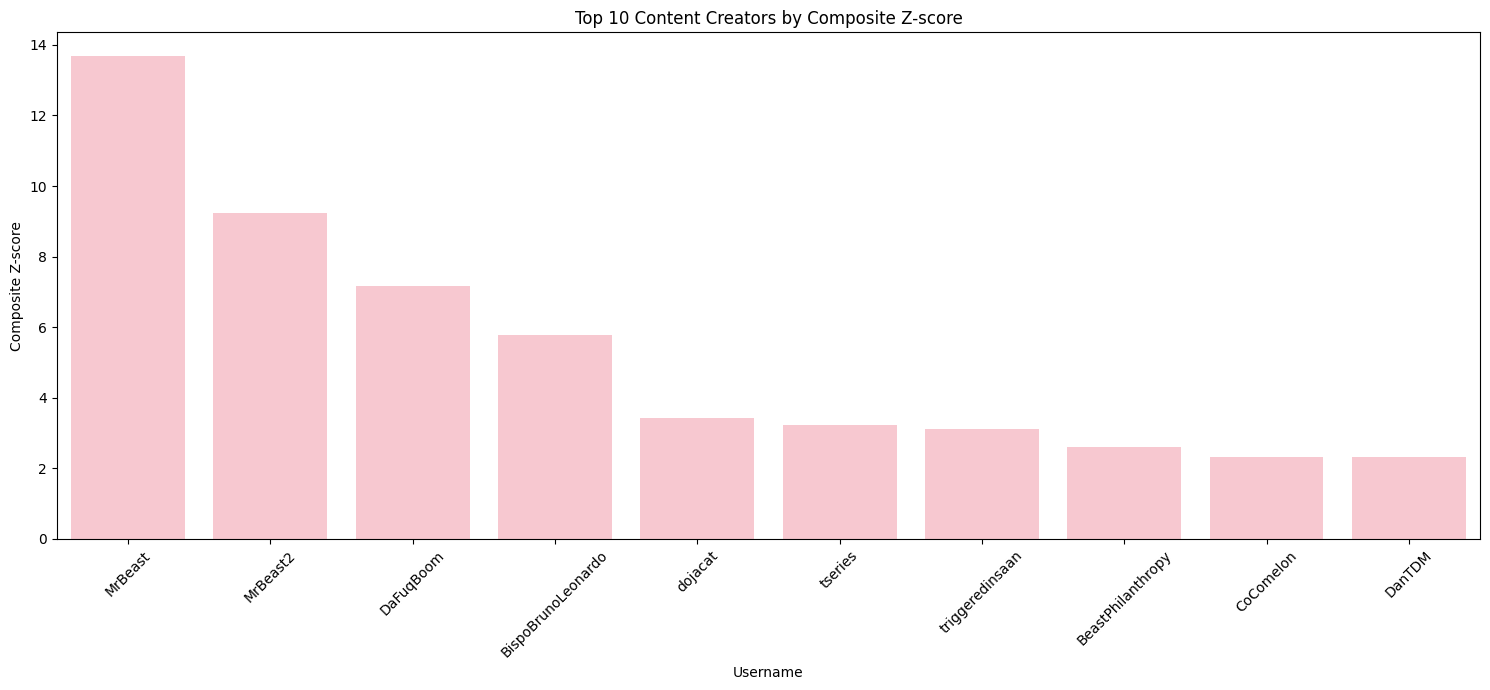

In [355]:
#Barplot shoeing top 10 content creators
plt.figure(figsize=(15, 7))
sns.barplot(data=top_creators_display, y='Composite_Z', x='Username', color='pink')
plt.title("Top 10 Content Creators by Composite Z-score")
plt.ylabel("Composite Z-score")
plt.xlabel("Username")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()